In [2]:
#! pip install pandas
#! pip install seaborn
#! pip install matplotlib


# Data-Importing

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# Set matplotlib parameters
plt.rcParams.update({
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 25,
    "axes.titleweight": "bold",
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "axes.labelsize": 20,
    "legend.fontsize": 15,
    "legend.title_fontsize": 15
})

# Set seaborn style
sns.set_theme(style="whitegrid")

In [5]:
# Read the CSV file
df = pd.read_csv('day.csv')



# Obsevations 

In [6]:
# Display first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Check Total rows and Columns in dataset.
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [10]:
# Check columns
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Data cleaning

In [11]:
# Change The datatype of Date columns so  further we can analyze the Bike rentals with respect to year months and days.
df['dteday'] = df['dteday'].astype('datetime64[ns]')

In [12]:
# Creating new columns Date.

df['Date'] = df['dteday'].dt.day

In [13]:
# Now We can Drop dteday
df.drop("dteday",axis=1 ,inplace=True)

In [14]:
df.drop(['casual', 'registered' , 'temp'],axis=1 ,inplace=True)

In [15]:
#Get distinct categories counts forSeasons categories
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [16]:
# checking Duplicate rows in our BikeData.
duplicates = df.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis

In [17]:
# create numeric columns list.
numeric_features = df.describe().columns
numeric_features

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt', 'Date'],
      dtype='object')

In [18]:
# create categorical column list
categorical_columns = list(set(df.columns) - set(numeric_features))
categorical_columns

[]

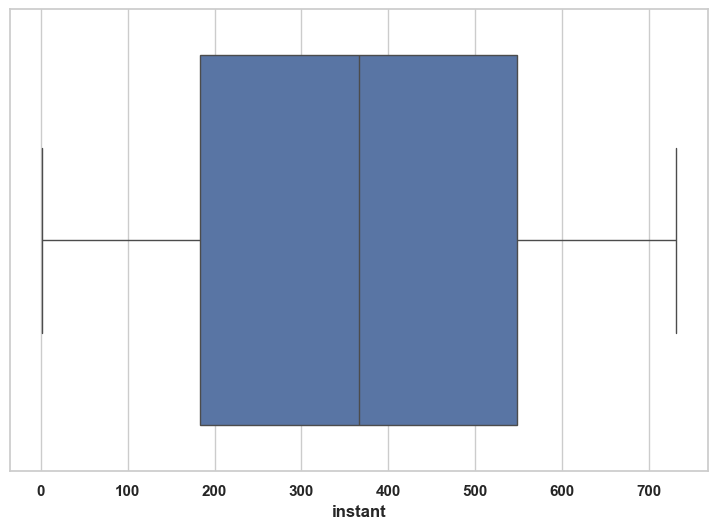

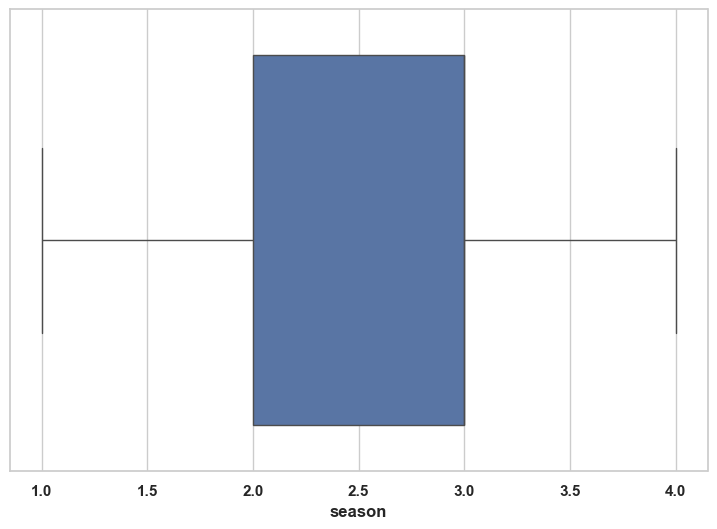

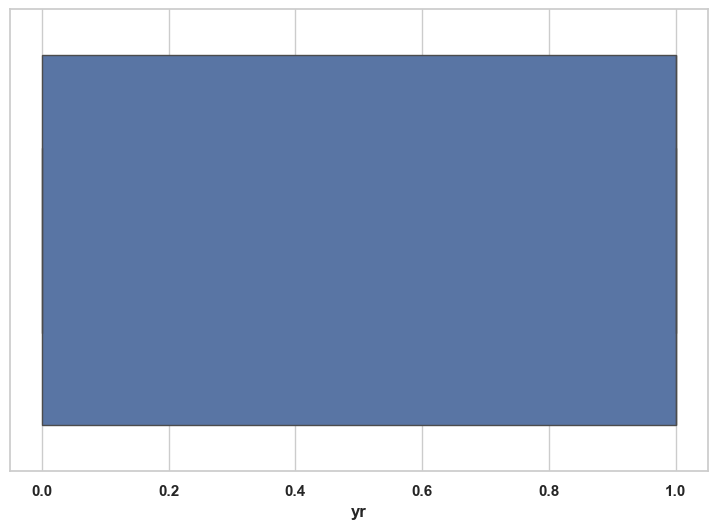

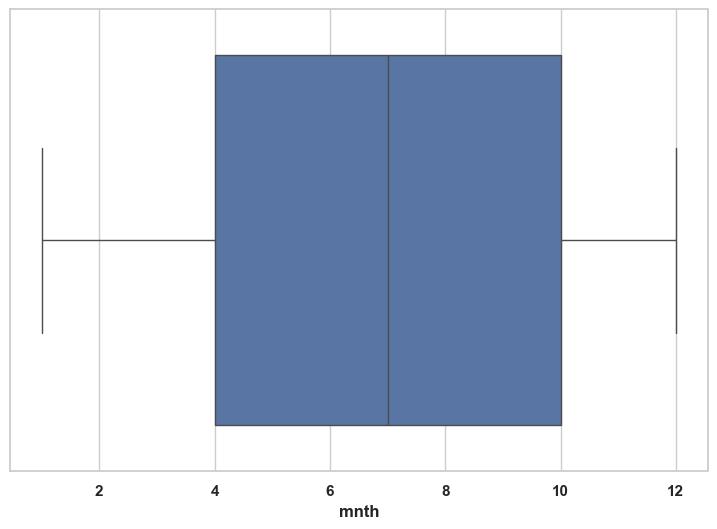

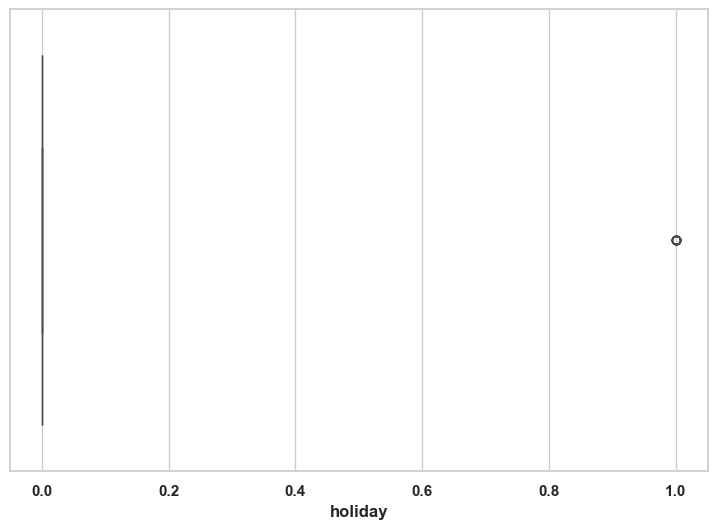

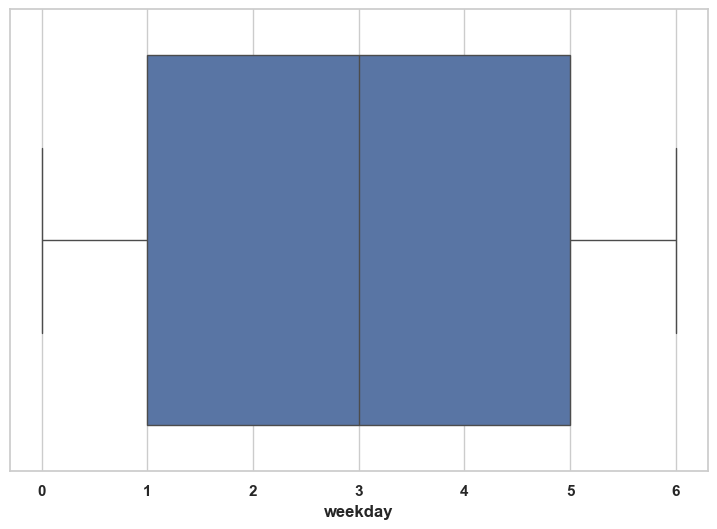

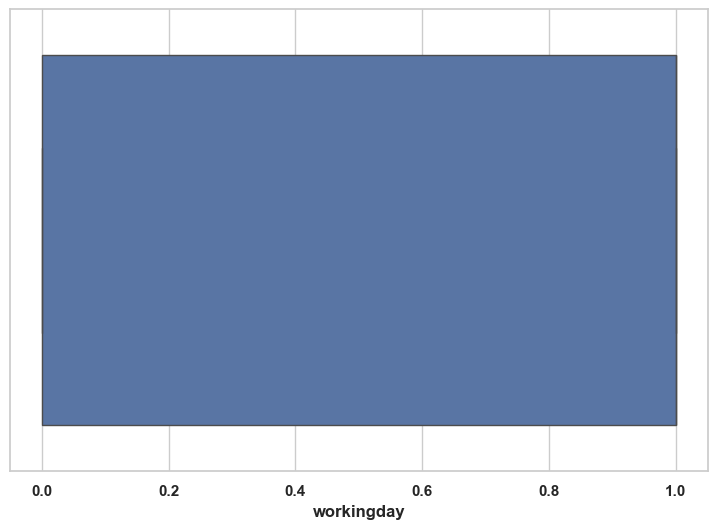

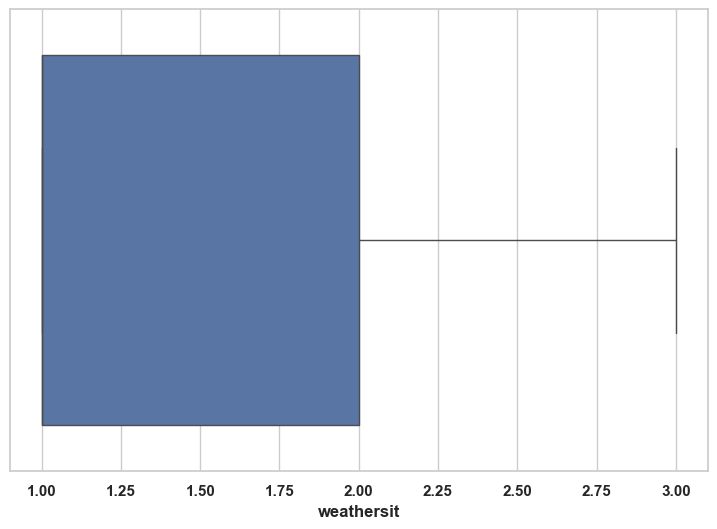

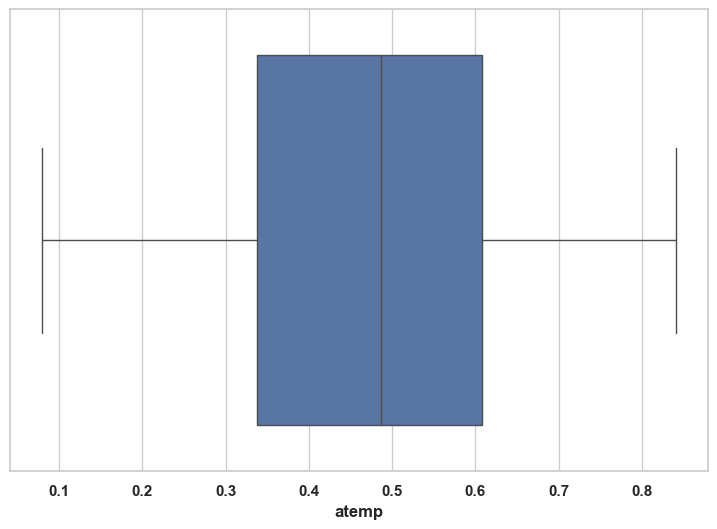

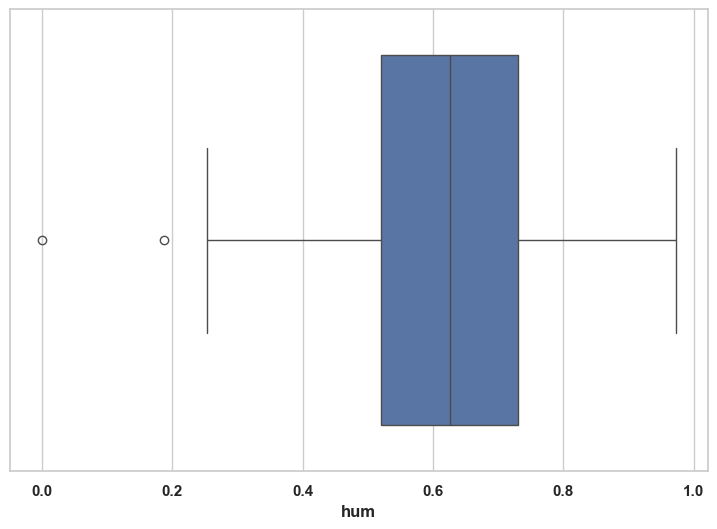

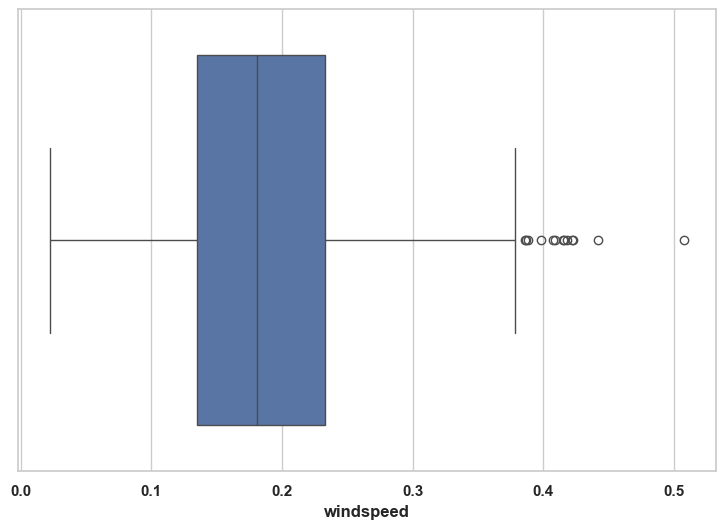

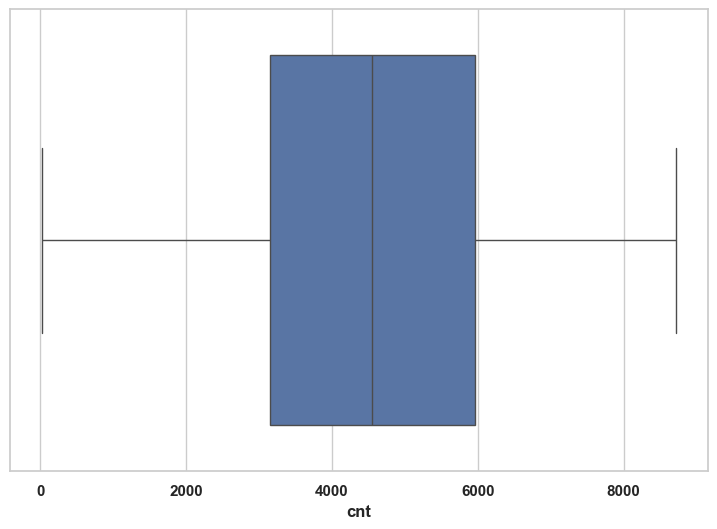

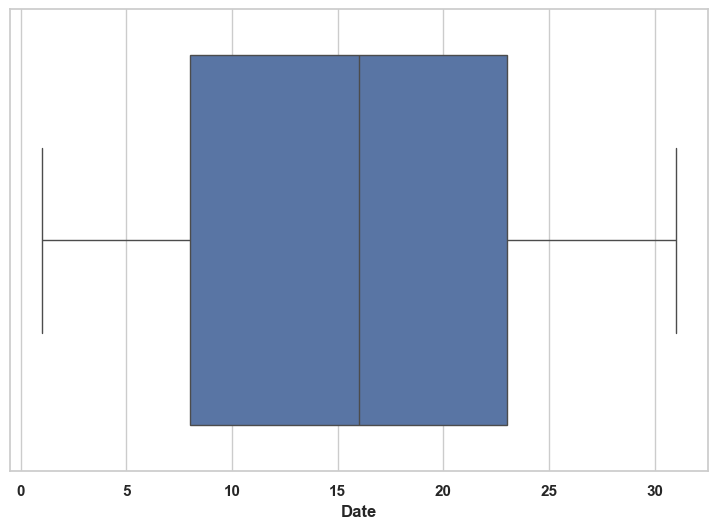

In [19]:
# plotting box plot of numeric columns to check oultliers
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

## Observation 
Windspeed , humidity and holiday has outliers 

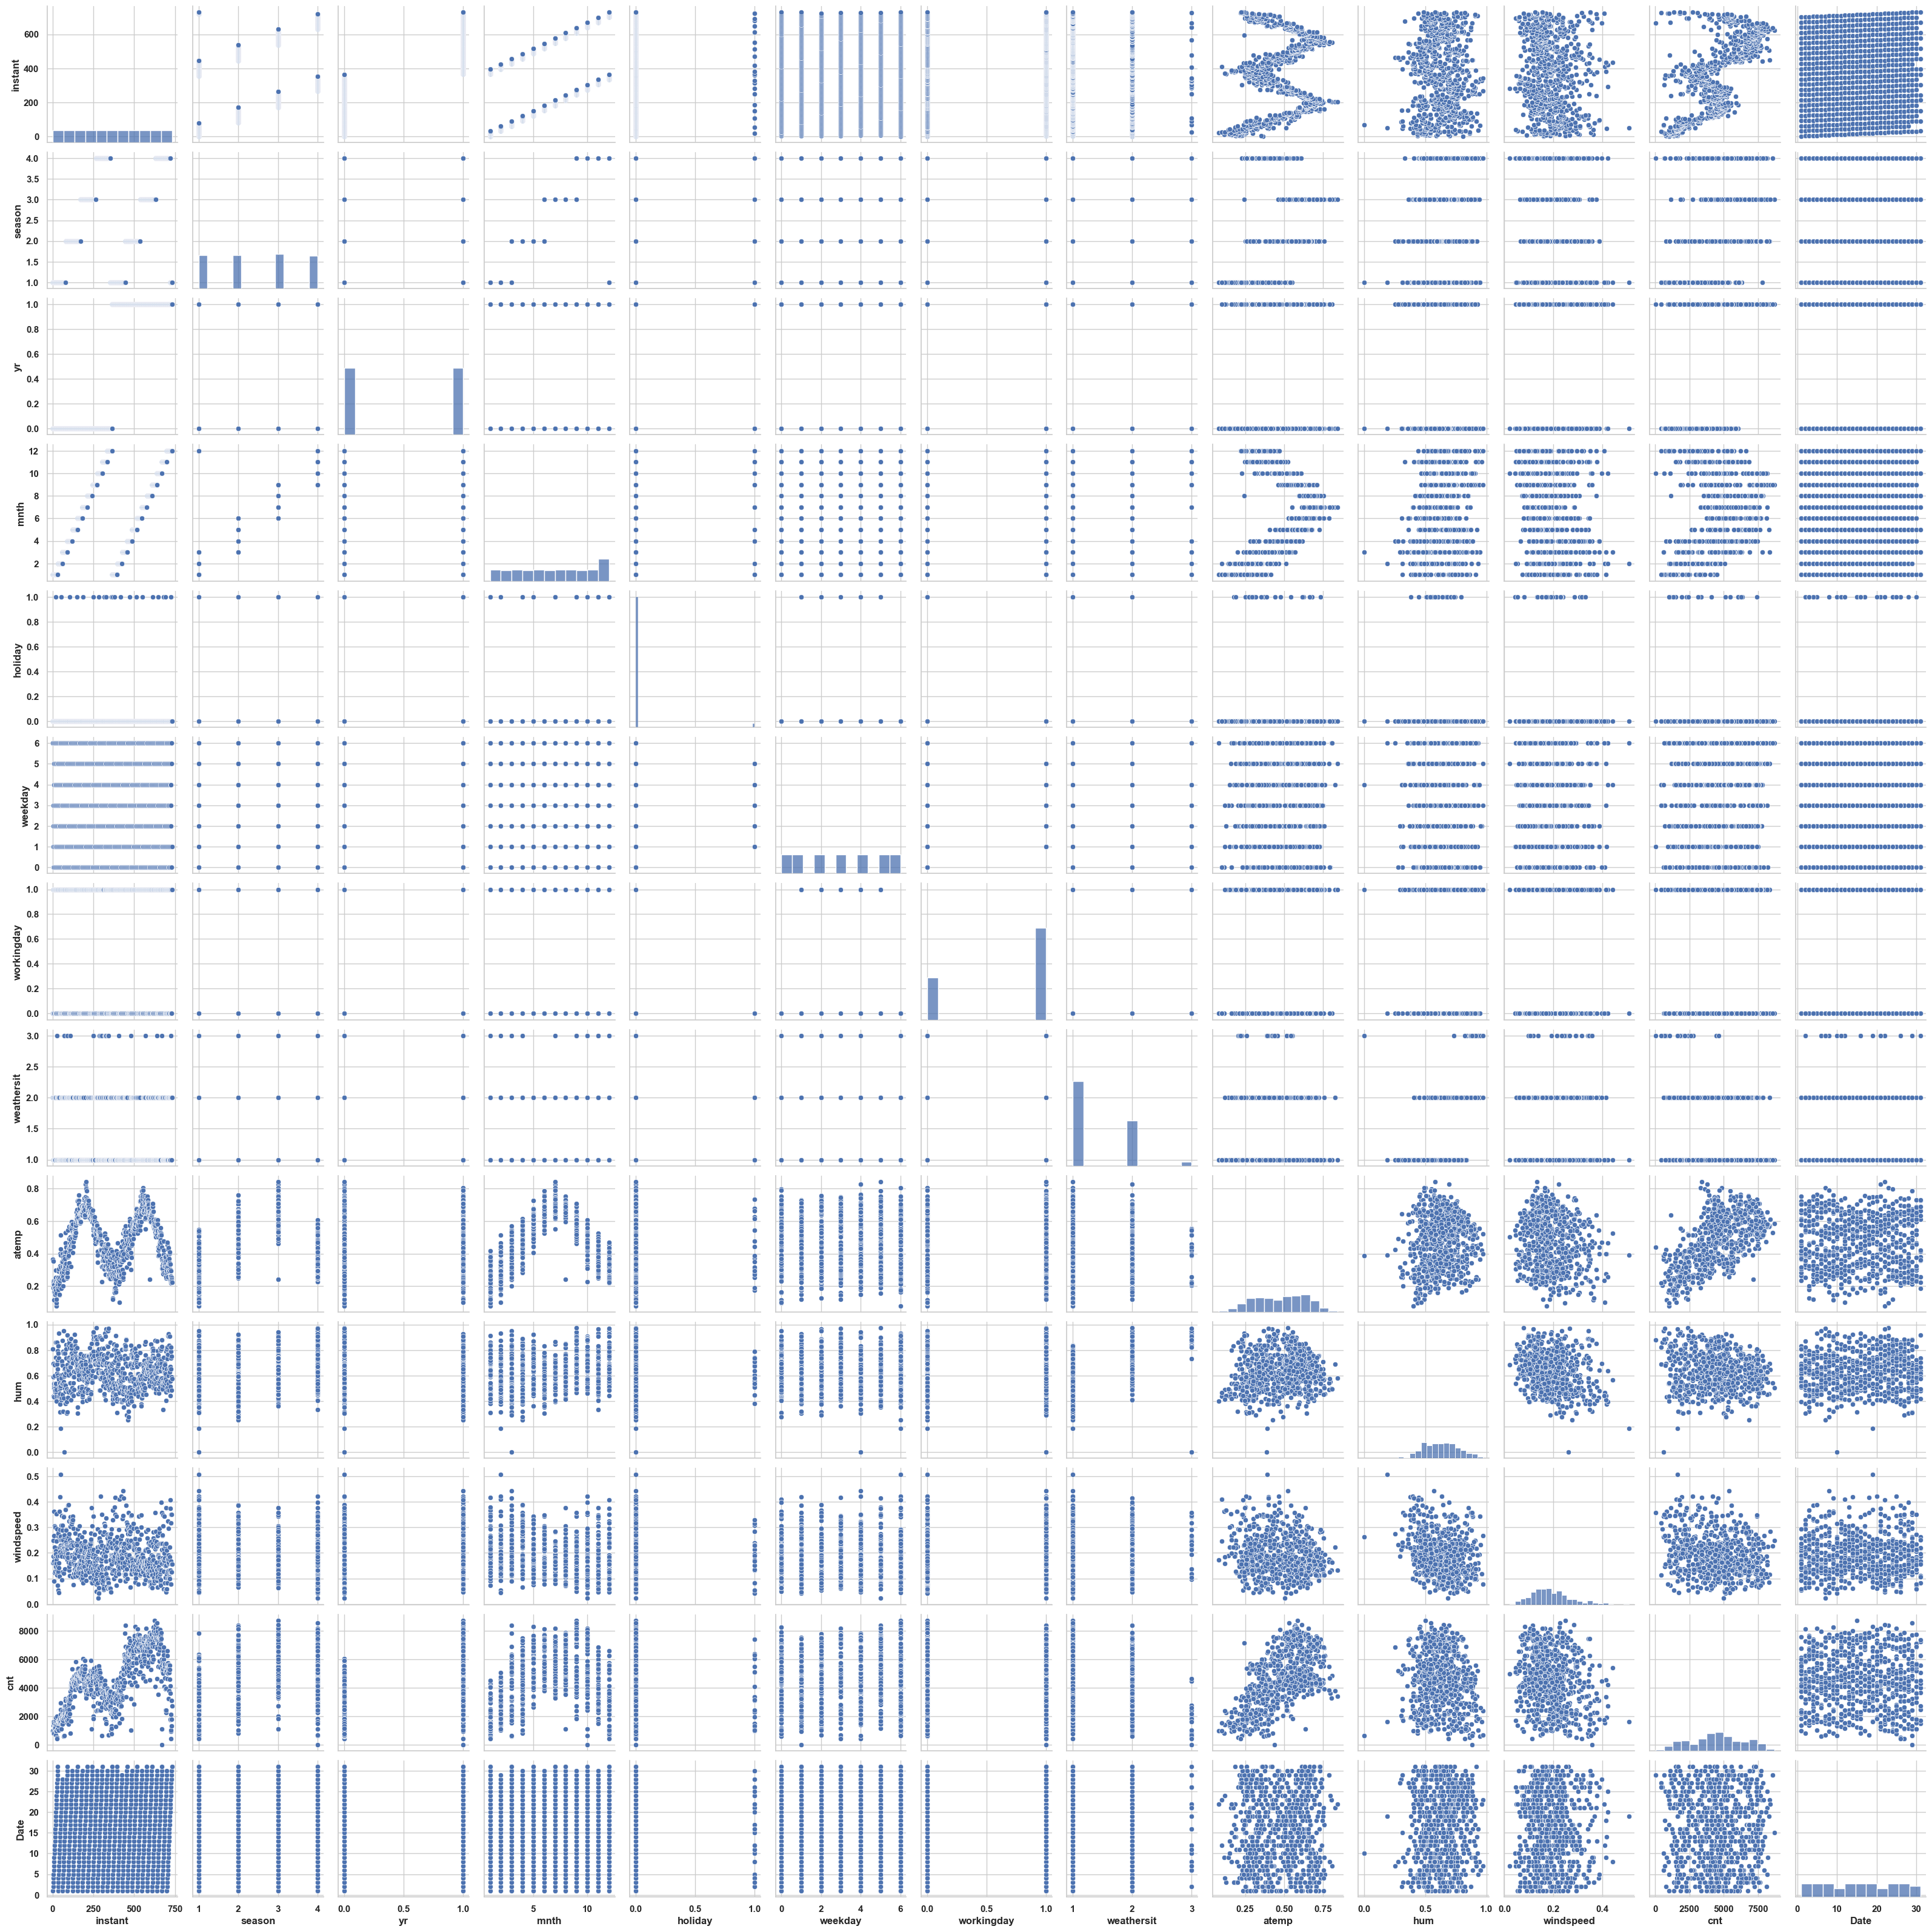

In [20]:
sns.pairplot(df)

Text(0.5, 1.0, 'Bike Rental Trend according to month')

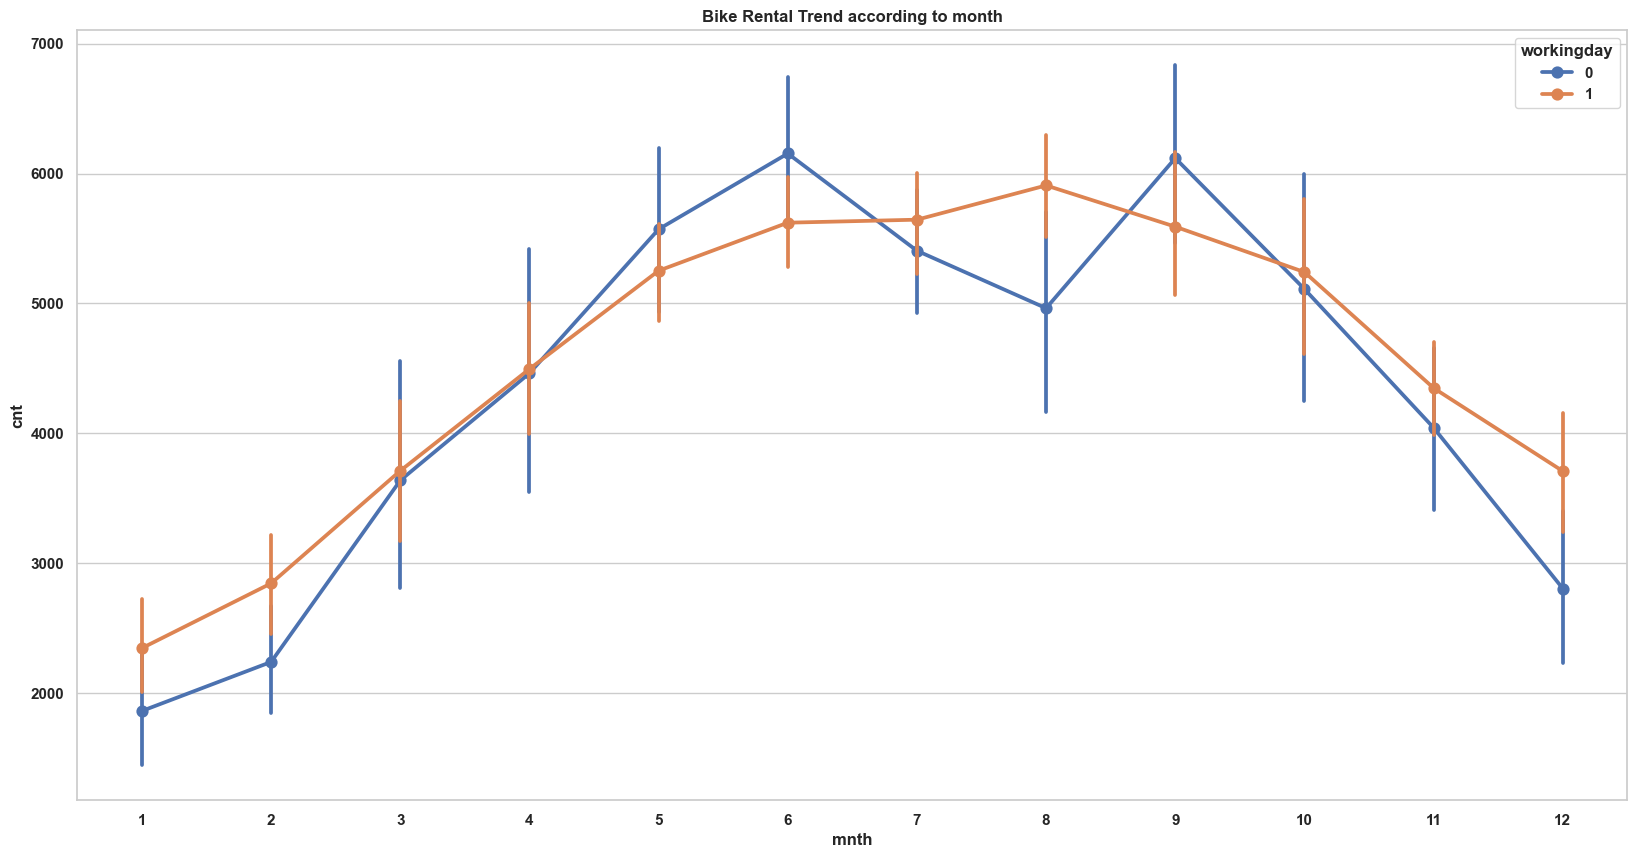

In [21]:
# Bike Rental trend with respect to month on working day.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['mnth'],y = df['cnt'],hue = df['workingday'])
plt.title("Bike Rental Trend according to month")

Text(0.5, 1.0, 'Bike Rental Trend according to season on Workingday')

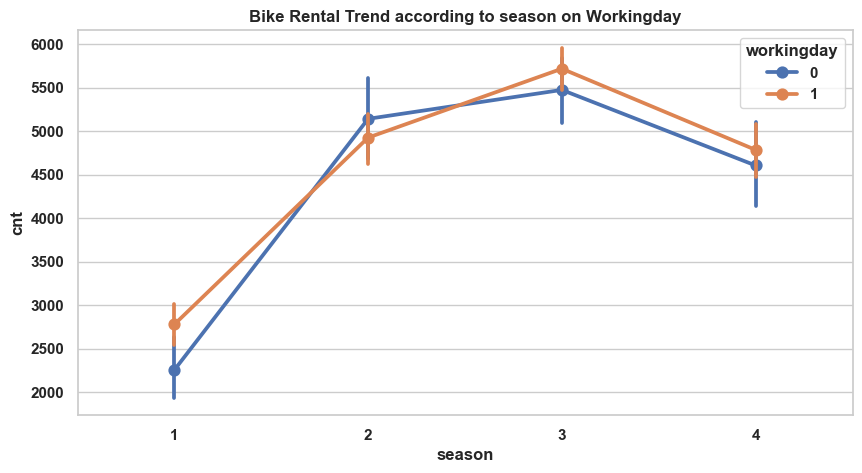

In [22]:
plt.figure(figsize=(10,5))
sns.pointplot(x = df['season'],y = df['cnt'],hue = df['workingday'])
plt.title("Bike Rental Trend according to season on Workingday")

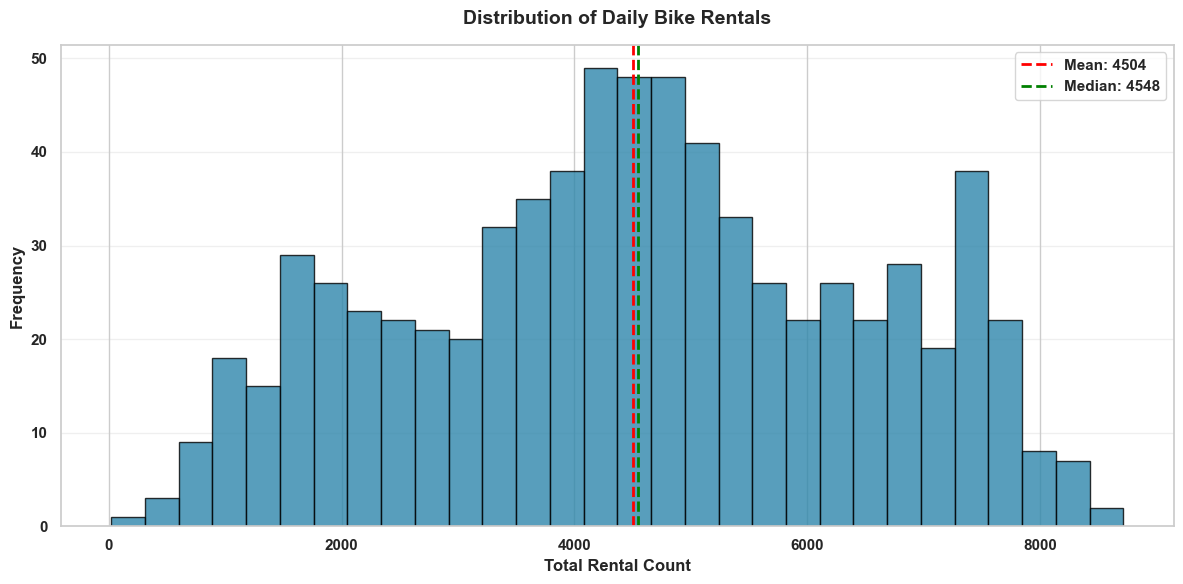

In [23]:
# Distribution of total bike rentals
plt.figure(figsize=(12, 6))
plt.hist(df['cnt'], bins=30, color='#2E86AB', alpha=0.8, edgecolor='black')
plt.axvline(df['cnt'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["cnt"].mean():.0f}')
plt.axvline(df['cnt'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["cnt"].median():.0f}')
plt.title('Distribution of Daily Bike Rentals', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Total Rental Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

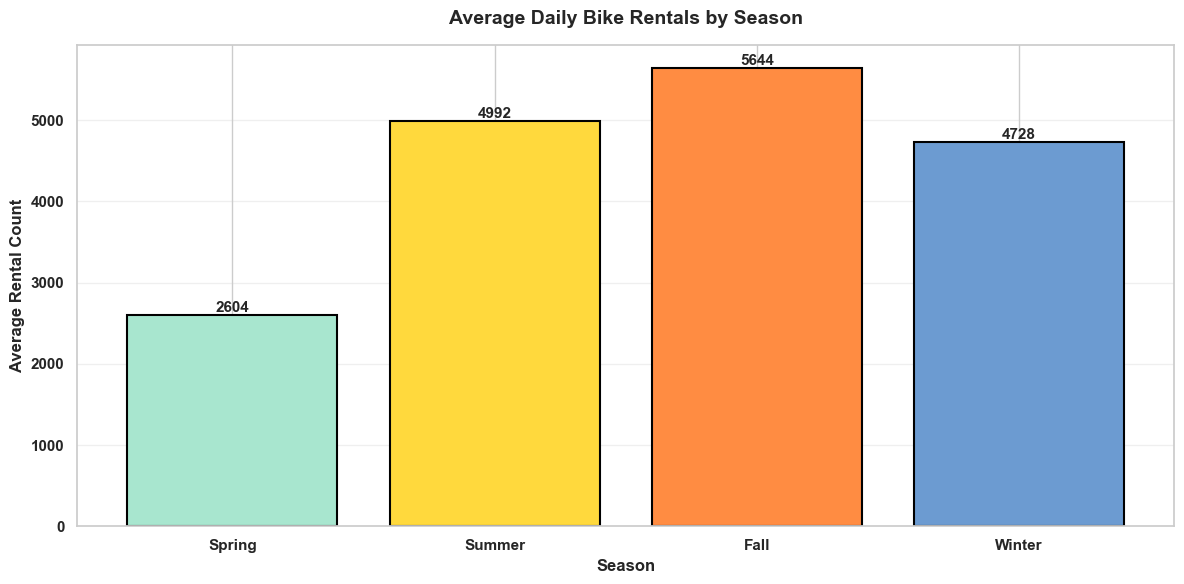

In [24]:
# Seasonal analysis
plt.figure(figsize=(12, 6))
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_map)
season_data = df.groupby('season_name')['cnt'].mean().reindex(['Spring', 'Summer', 'Fall', 'Winter'])
colors = ['#A8E6CF', '#FFD93D', '#FF8C42', '#6C9BD1']
bars = plt.bar(season_data.index, season_data.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Average Daily Bike Rentals by Season', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rental Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

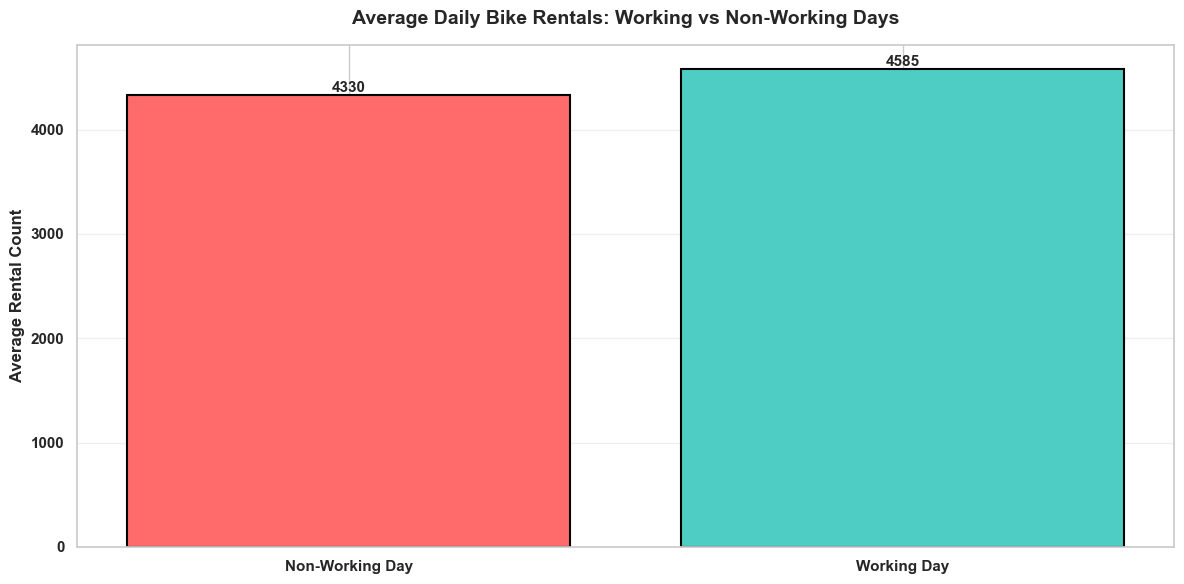

In [25]:
	
# Working day vs non-working day
plt.figure(figsize=(12, 6))
workday_data = df.groupby('workingday')['cnt'].mean()
labels = ['Non-Working Day', 'Working Day']
colors = ['#FF6B6B', '#4ECDC4']
bars = plt.bar(labels, workday_data.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Average Daily Bike Rentals: Working vs Non-Working Days', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Average Rental Count', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Observation :

Clear weather - highest rentals; Rain - lowest rentals.

Bad weather decreases demand in all seasons.

Weather condition is a strong factor affecting rentals.

Working days show consistent, higher rentals.

Non-working days show smaller peaks on weekends.

# Distrubion of Target Variable

<Axes: xlabel='cnt'>

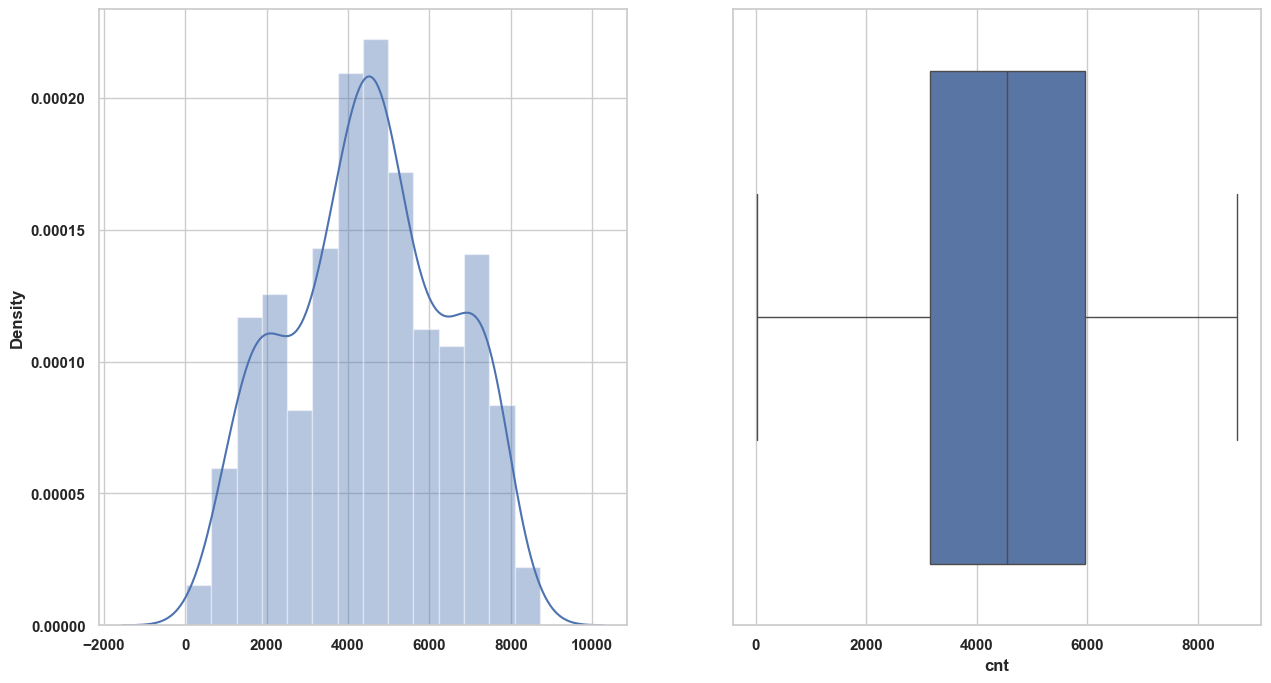

In [26]:

# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='b',ax=axes[0])
sns.boxplot(x = df['cnt'],color='b',ax=axes[1])

<Axes: xlabel='cnt'>

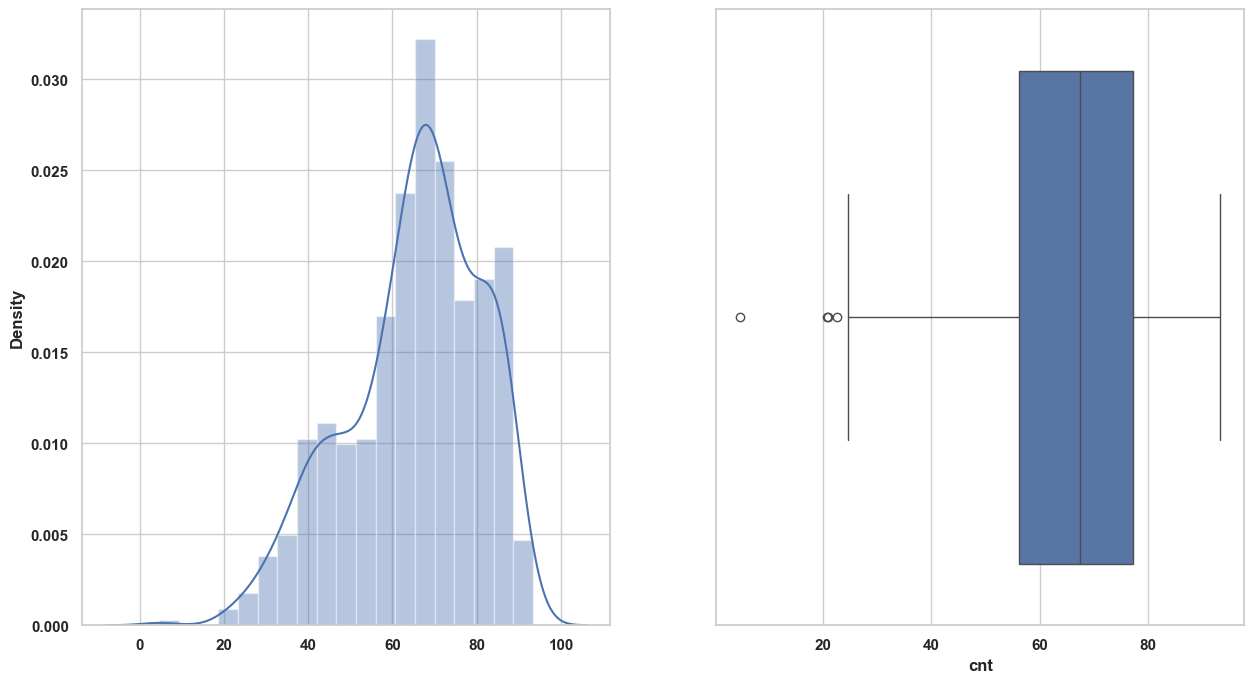

In [27]:
# Normalizing  our target variable by squre root method
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(df['cnt']),color='b',ax=axes[0])
sns.boxplot(x = np.sqrt(df['cnt']),color='b',ax=axes[1])

# Univariate Analysis

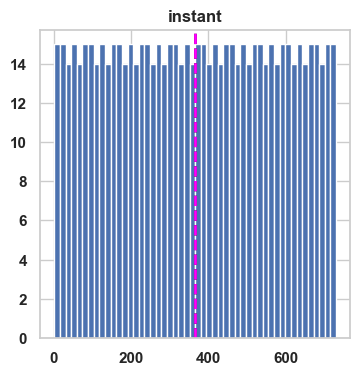

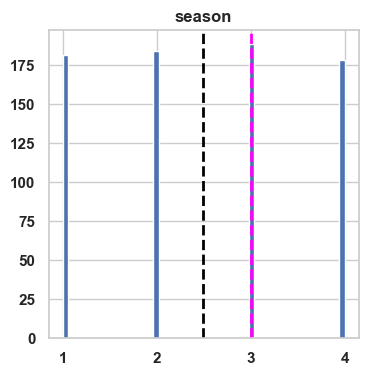

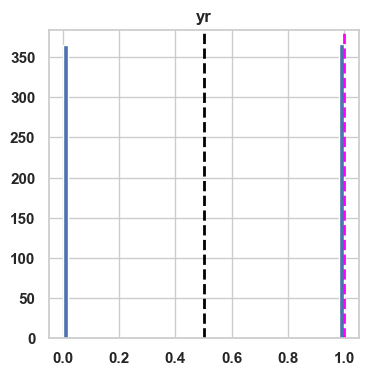

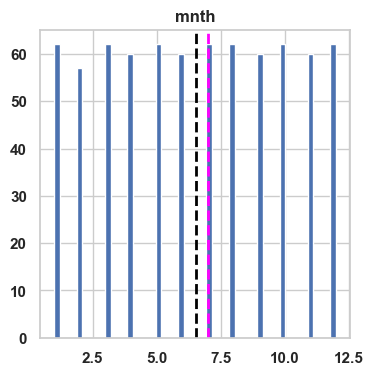

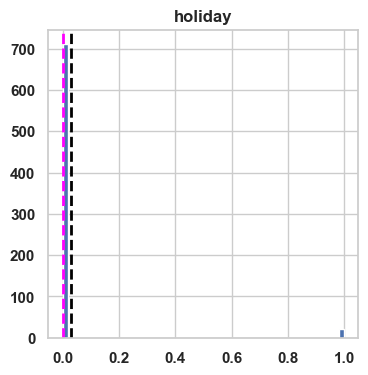

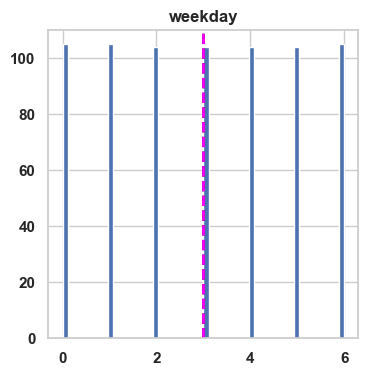

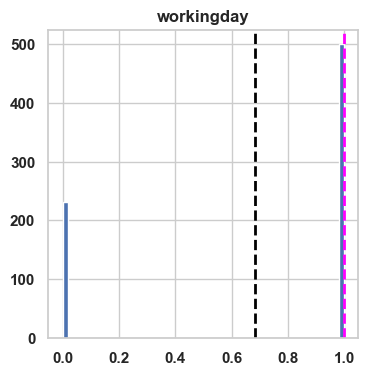

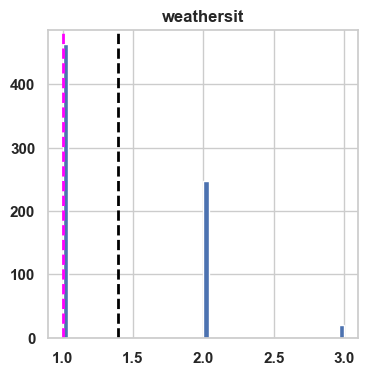

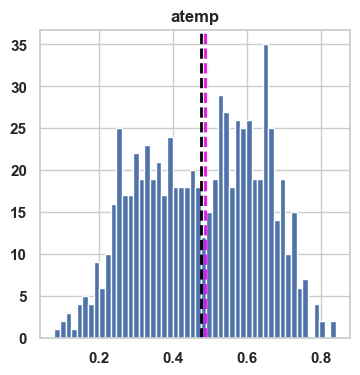

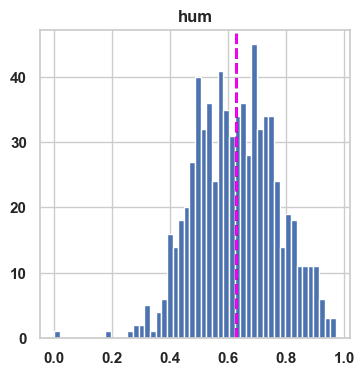

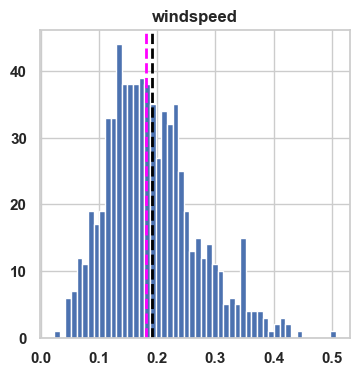

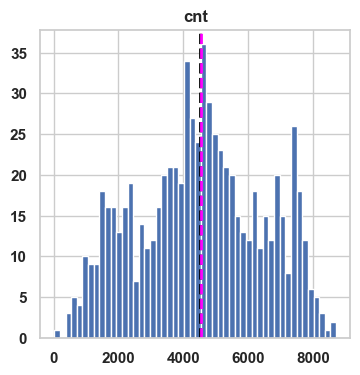

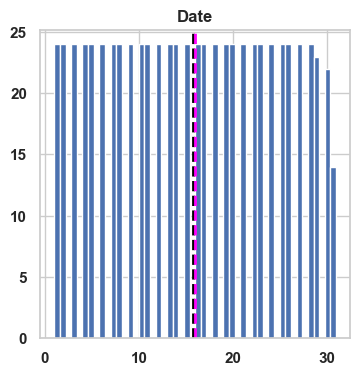

In [28]:
for col in numeric_features:
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

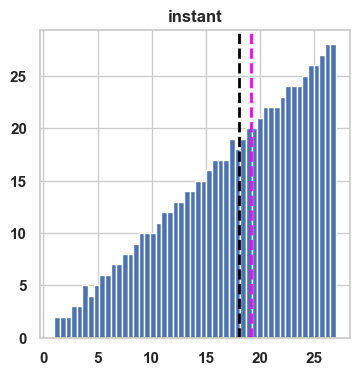

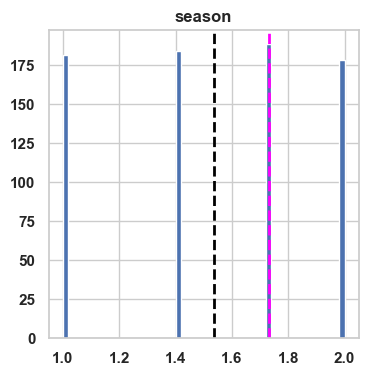

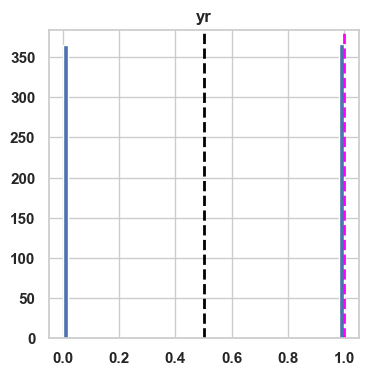

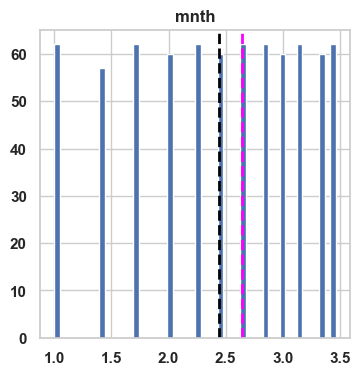

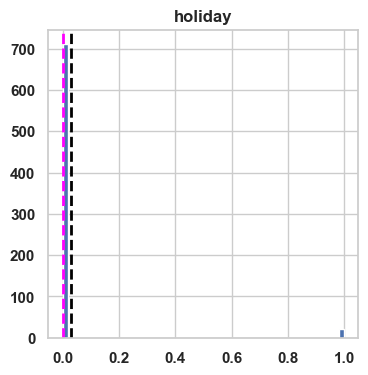

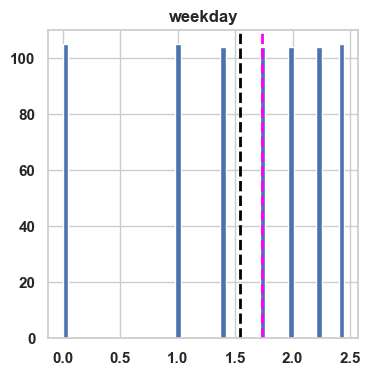

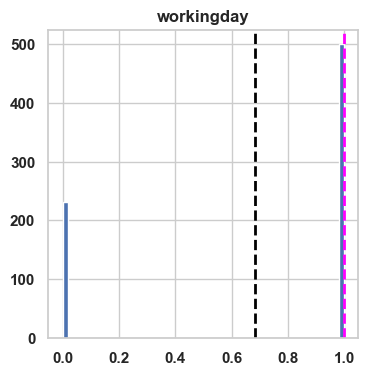

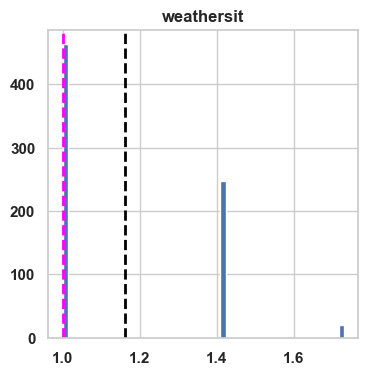

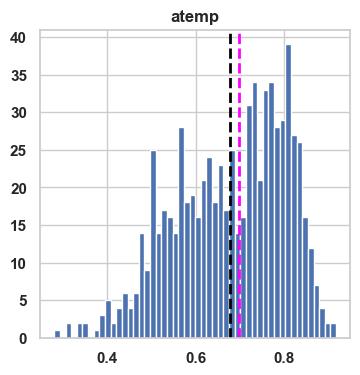

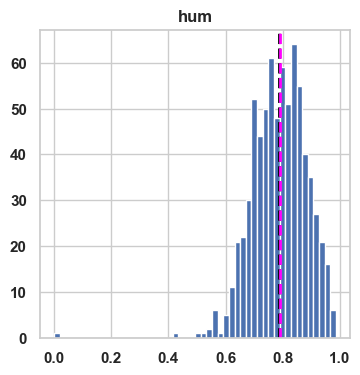

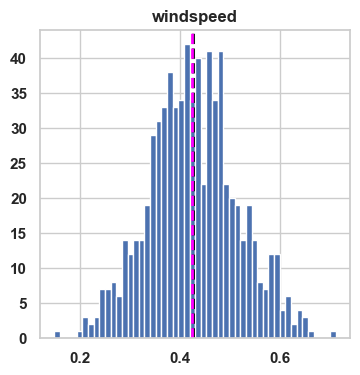

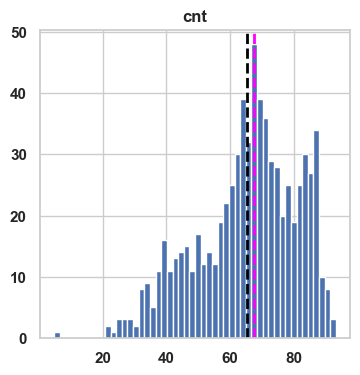

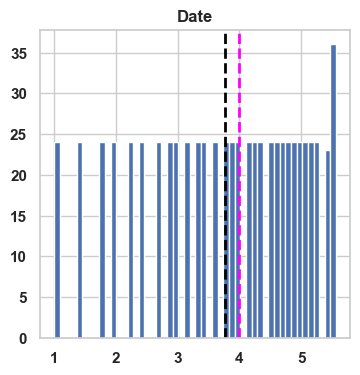

In [29]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

# Bivariate Analysis

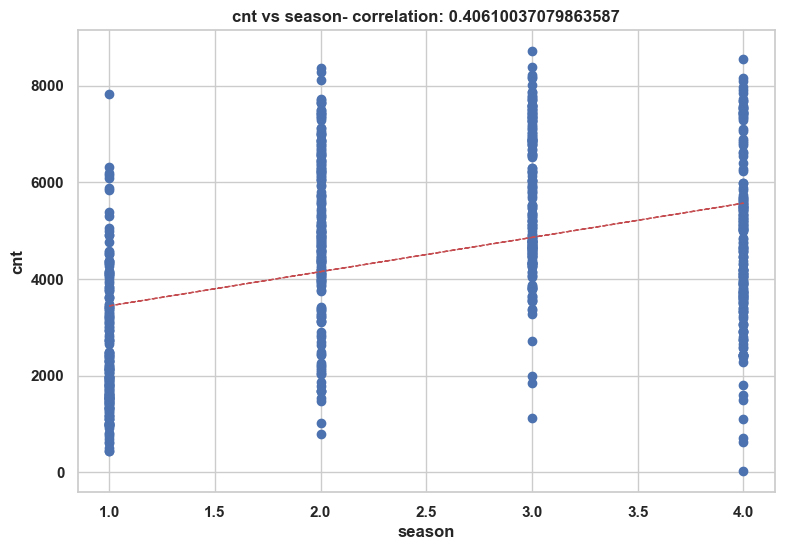

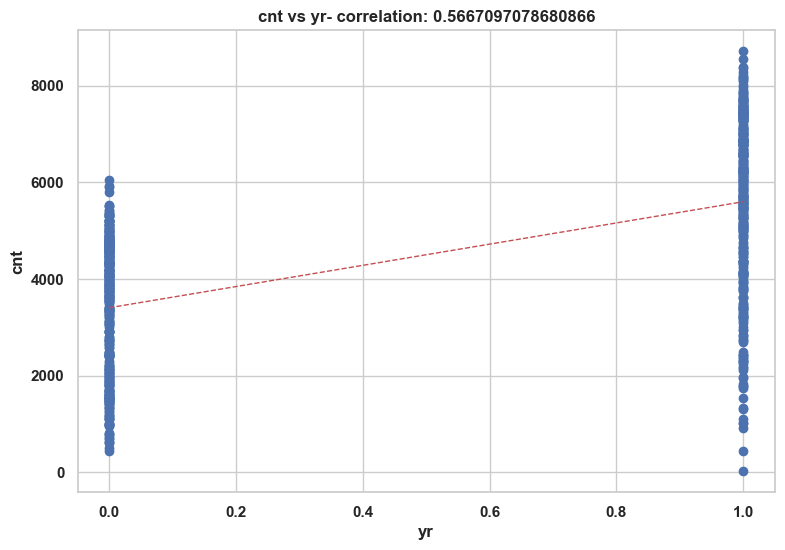

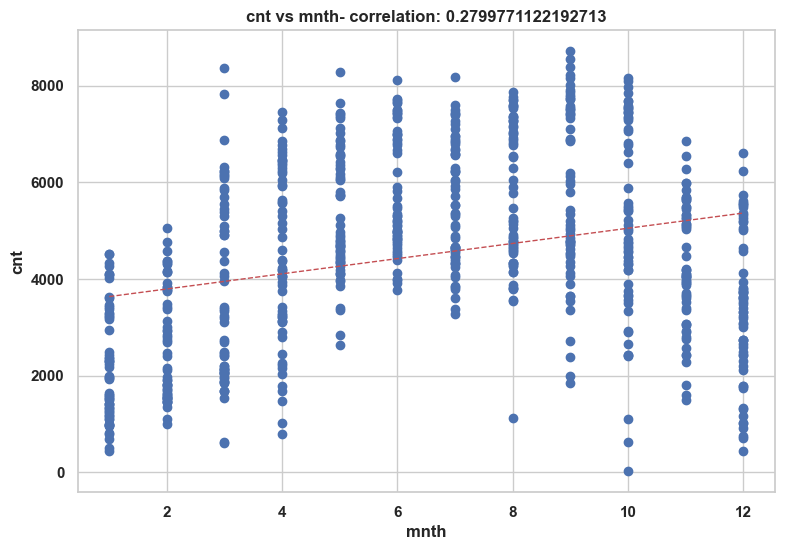

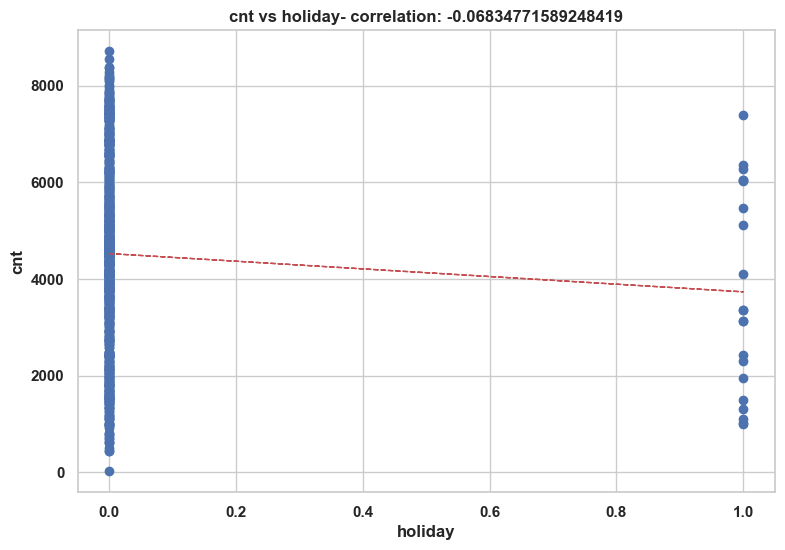

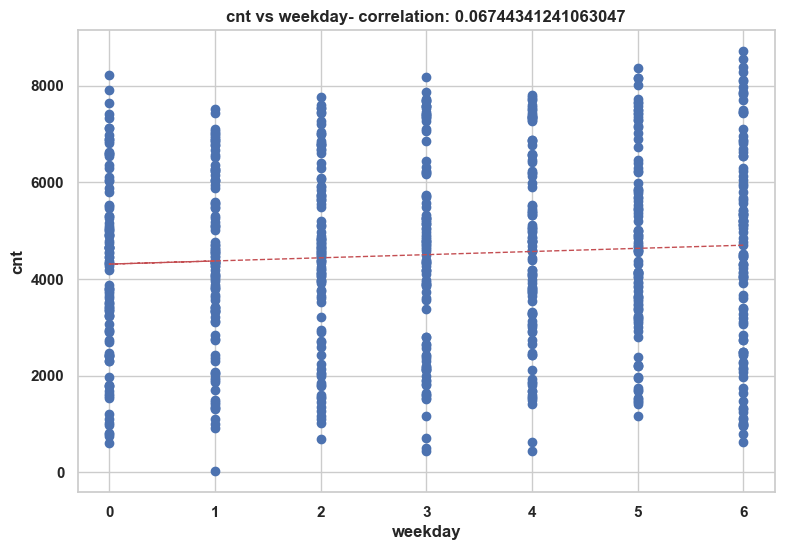

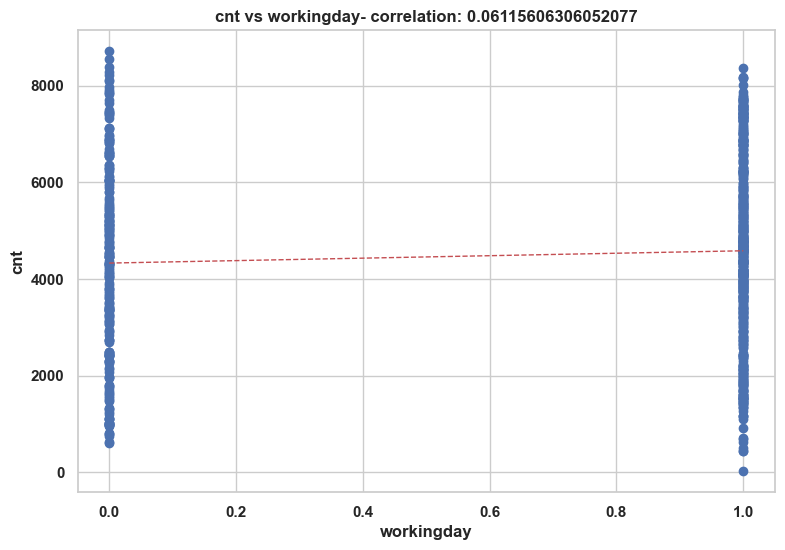

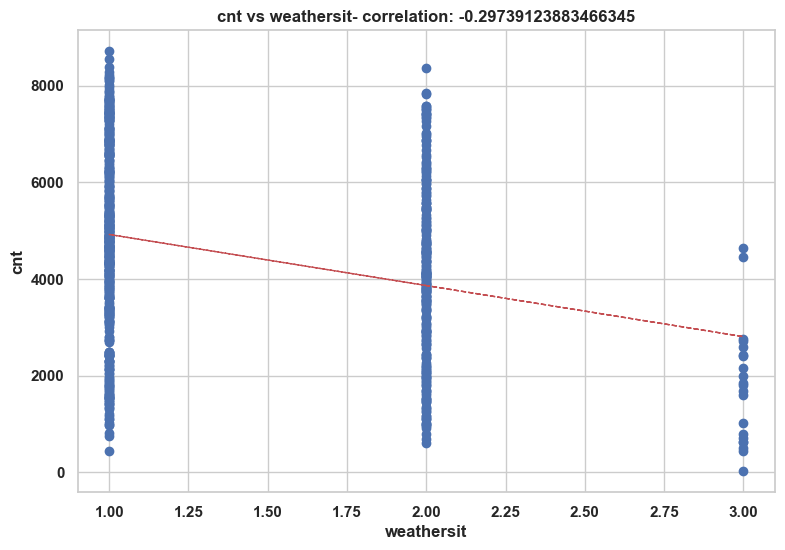

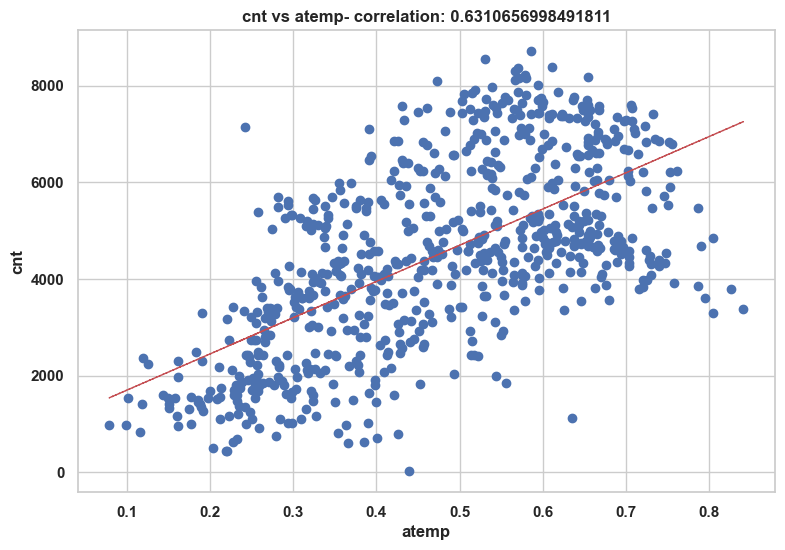

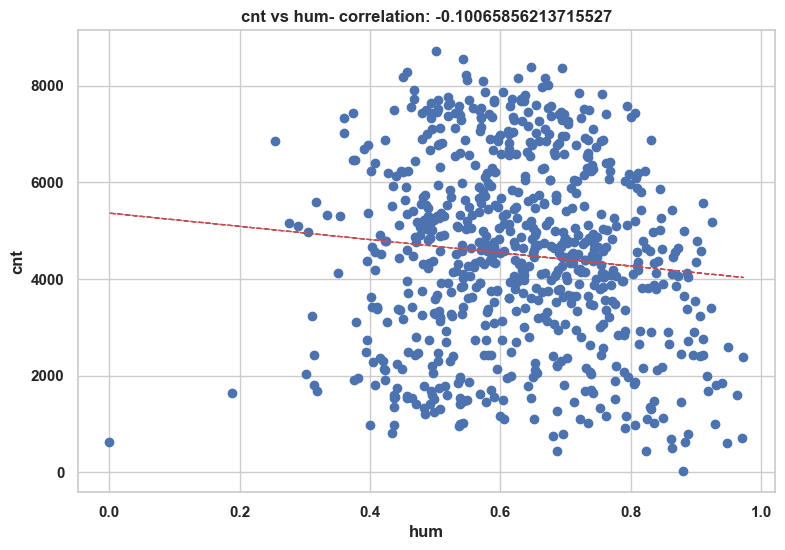

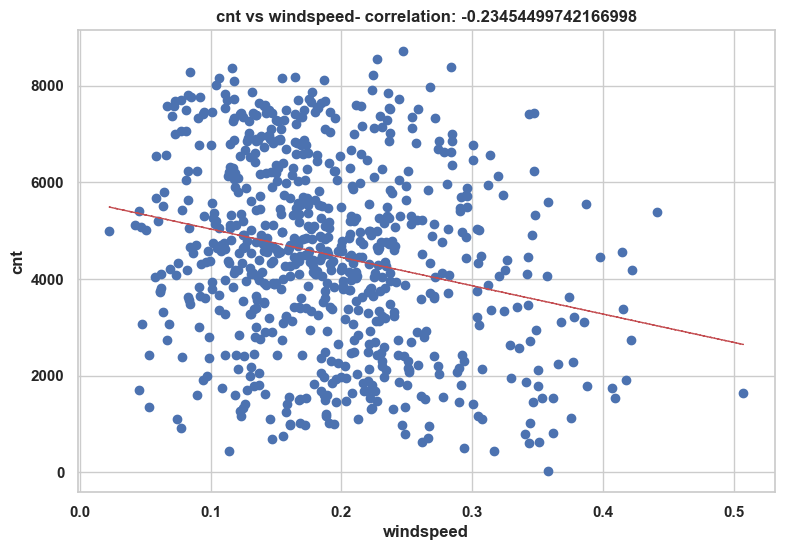

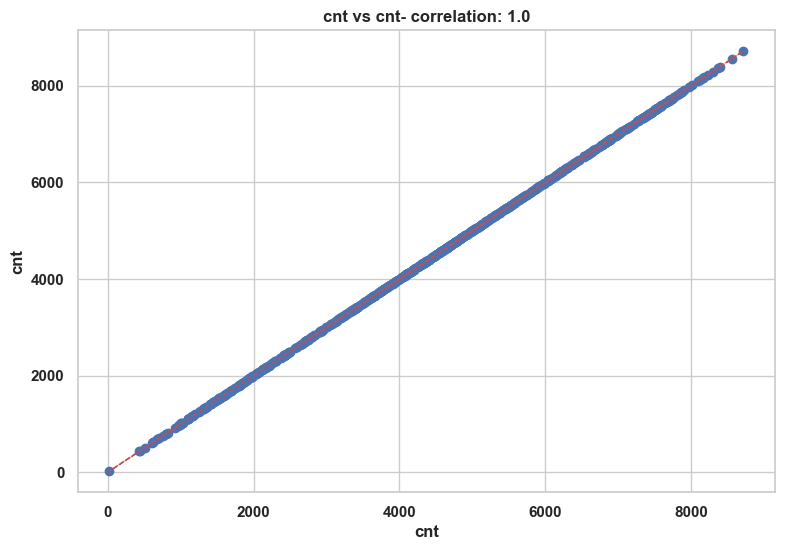

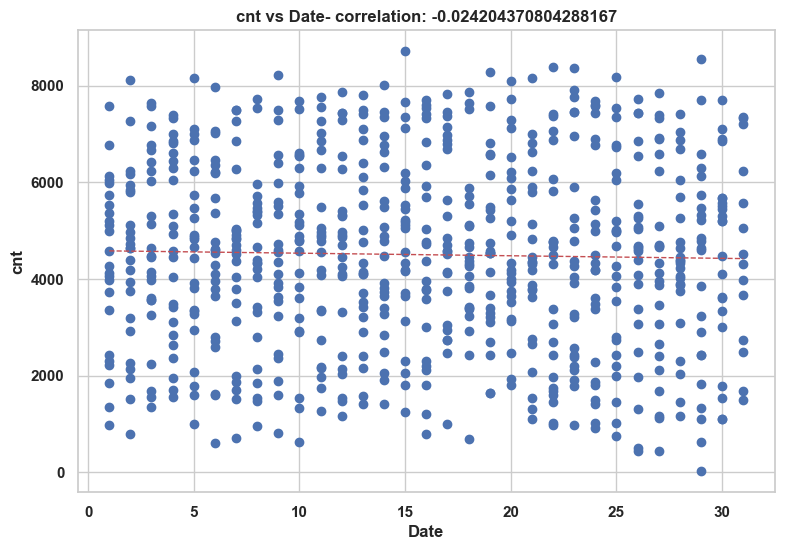

In [30]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('cnt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

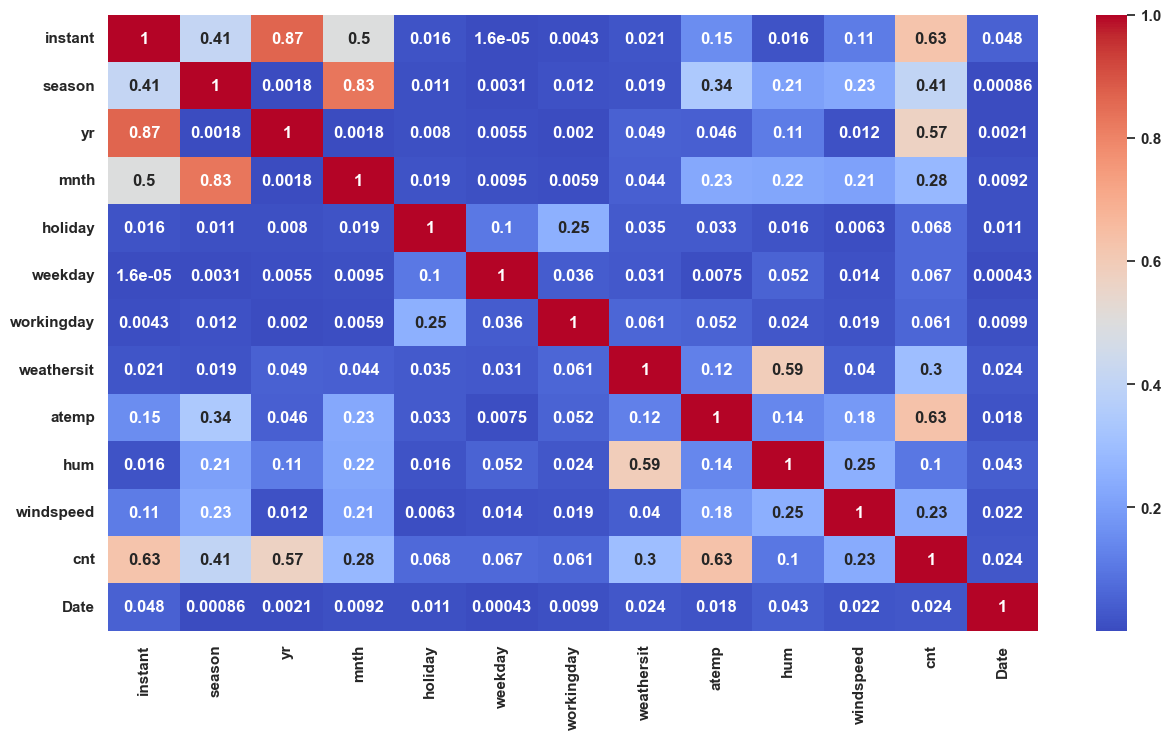

In [31]:
 ## Correlation
plt.figure(figsize=(15,8))

correlation = df.corr(numeric_only=True)

sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## Observation 
Count has high correlation with instant , year , atemp , season 

In [32]:
df = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)
df.drop("season_name",axis=1 ,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   yr            731 non-null    int64  
 2   holiday       731 non-null    int64  
 3   workingday    731 non-null    int64  
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   cnt           731 non-null    int64  
 8   Date          731 non-null    int32  
 9   season_2      731 non-null    bool   
 10  season_3      731 non-null    bool   
 11  season_4      731 non-null    bool   
 12  mnth_2        731 non-null    bool   
 13  mnth_3        731 non-null    bool   
 14  mnth_4        731 non-null    bool   
 15  mnth_5        731 non-null    bool   
 16  mnth_6        731 non-null    bool   
 17  mnth_7        731 non-null    bool   
 18  mnth_8        731 non-null    

In [35]:
import os

output_folder = "/Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand" 

output_path = os.path.join(output_folder, "preprocessed_day.csv")

df.to_csv(output_path, index=False)
print(f"Preprocessed file saved at: {output_path}")

Preprocessed file saved at: /Users/harshita/vs_code/Infosys_springboard/RideWise-Predicting-Bike-sharing-Demand/preprocessed_day.csv
